# Import Dependencies

In [41]:
import geopandas as gpd
import matplotlib as plt
% matplotlib inline

# Load Data

In [ ]:
# California Climate Investments to Benefit Disadvantaged Communities
source_site = "https://calepa.ca.gov/envjustice/ghginvest/"
dac = gpd.read_file("./data/dac/disadv_comms.geojson")

In [19]:
dac_meta = pd.ExcelFile("./data/dac/SB-535-List-of-DACs_CES30.xlsx")
dac_list = dac_meta.parse('SB535 List')
dac_all = dac_meta.parse('SB535 All Data')
dac_dict = dac_meta.parse('Data Dictionary')

# CalEnviroScreen 3.0
"""
CalEnviroScreen is a screening methodology that can be used to help 
identify California communities that are disproportionately burdened 
by multiple sources of pollution. This version updates CalEnviroScreen 
in a variety of ways. The updates are described in more detail in the 
New in CalEnviroScreen 3.0 document below. 
"""
ces3_source_site = "https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-30"
ces3_master = pd.ExcelFile('./data/dac/ces3results.xlsx')
ces3_final = ces3_master.parse('CES3.0FINAL_results')
ces3_dict = ces3_master.parse('Data Dictionary')
ces3_dem = ces3_master.parse('Demographic profile')

## EDA

## Geodata on Disadvantaged Communities

In [7]:
dac.head()

,fid,Name,African_American____,pestP,iwbP,hazP,pov,Shape_Length_12,housingB,ling,...,Children___10____,ozone,CIscore,pest,Native_American____,traffic,cvd,Hispanic____,cvdP,geometry
1999,SB_535_Disadvantaged_Communities.1999,,,0,63.16604,25.764597,24.4,,11.3,9.1,...,,0.046178,39.703256,0,,1348.29,10.11,,75.651415,(POLYGON Z ((-118.090359158227 34.019843861122...
2000,SB_535_Disadvantaged_Communities.2000,,,0,0,67.599629,36.5,,25.2,4.6,...,,0.057294,43.187462,0,,1426.09,8.45,,56.576487,(POLYGON Z ((-118.493437243536 34.221098859748...
2001,SB_535_Disadvantaged_Communities.2001,,,16.689751,94.406367,83.373494,32.6,,17.8,9.1,...,,0.042299,60.095731,0.058003,,1988.92,9.43,,68.146116,(POLYGON Z ((-118.264777174042 33.846519832070...
2002,SB_535_Disadvantaged_Communities.2002,,,0,0,8.563485,17.8,,12,11.3,...,,0.046178,39.429747,0,,1294.03,8.74,,60.029921,(POLYGON Z ((-118.335110200496 34.022680847463...
2003,SB_535_Disadvantaged_Communities.2003,,,0,0,68.007414,30,,5.5,23.2,...,,0.046178,48.843959,0,,1379.41,11.54,,86.061588,(POLYGON Z ((-118.057075144124 33.913177851083...


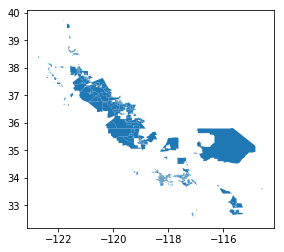

In [42]:
dac.plot()

## Nongeo Disadvantaged Communities

In [16]:
dac_list.head()

,Census Tract,CalEnviroScreen 3.0 Score,CalEnviroScreen 3.0 Percentile Range,Pollution Burden Percentile,Population Characteristics Percentile,Total Population,California County,Approximate Zip Code,Nearby City (to help approximate location only)
0,6019001100,94.0894,96-100% (highest scores),99.950218,99.697314,3174,Fresno,93706,Fresno
1,6071001600,90.6778,96-100% (highest scores),100.000000,98.108210,6133,San Bernardino,91761,Ontario
2,6019000200,85.9688,96-100% (highest scores),99.004356,99.987388,3167,Fresno,93706,Fresno
3,6077000801,82.491,96-100% (highest scores),99.576851,97.729852,6692,San Joaquin,95203,Stockton
4,6019001500,82.0303,96-100% (highest scores),99.987554,92.773364,2206,Fresno,93725,Fresno


In [20]:
dac_all.head()

,Census Tract,Total Population,California County,Approximate Zip Code,Nearby City (to help approximate location only),Longitude,Latitude,CalEnviroScreen 3.0 Score,CalEnviroScreen 3.0 Percentile Range,Ozone,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.089387,96-100% (highest scores),0.064889,...,16.2,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,9.553440,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677825,96-100% (highest scores),0.062163,...,33.4,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,9.067783,98.108210
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.968804,96-100% (highest scores),0.062163,...,16.7,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,9.808662,99.987388
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.490978,96-100% (highest scores),0.046178,...,15.3,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,8.991455,97.729852
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030324,96-100% (highest scores),0.064889,...,14.7,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,8.304296,92.773364


In [29]:
dac_dict_clean = dac_dict[11:]
dac_dict_clean.columns = ['variable', 'description', 'calenvironscreen_category']
dac_dict_clean.head()

,variable,description,calenvironscreen_category
11,Census Tract,Census Tract ID from 2010 Census,NaN
12,Total Population,2010 population in census tracts,NaN
13,California County,California county that the census tract falls ...,NaN
14,Approximate Zip Code,Postal ZIP Code that the census tract falls wi...,NaN
15,Nearby City,City or nearby city the the census tract falls...,NaN


## CaliforniaEnvironSurvey

In [30]:
ces3_final.head()

,Census Tract,Total Population,California County,ZIP,City,Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.089387,100.000000,96-100% (highest scores),...,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553440,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677825,99.987388,96-100% (highest scores),...,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067783,98.108210
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.968804,99.974776,96-100% (highest scores),...,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808662,99.987388
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.490978,99.962164,96-100% (highest scores),...,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991455,97.729852
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030324,99.949552,96-100% (highest scores),...,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304296,92.773364


In [39]:
ces3_final.loc[ces3_final['Census Tract'] == 6001425103] 

,Census Tract,Total Population,California County,ZIP,City,Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
3910,6001425103,2502,Alameda,94608,Emeryville,-122.289844,37.84262,25.418604,50.68735,51-55%,...,4.839355,16.6,19.459459,4.3,8.059398,14.9,34.691546,42.305777,4.387406,38.050195


In [32]:
ces3_dict

,CalEnviroScreen 3.0: Data Dictionary,Unnamed: 1,Unnamed: 2
0,"For more information, see the report and acces...",NaN,NaN
1,CalEnviroScreen 3.0 Webpage,NaN,NaN
2,A web map of the CalEnviroScreen 3.0 results i...,NaN,NaN
3,CalEnviroScreen 3.0 Web Map,NaN,NaN
4,NaN,NaN,NaN
5,Variable Name,Description,CalEnviroScreen Category
6,Census Tract,Census Tract ID from 2010 Census,NaN
7,Total Population,2010 population in census tracts,NaN
8,California County,California county that the census tract falls ...,NaN
9,ZIP,Postal ZIP Code that the census tract falls wi...,NaN


In [34]:
ces3_dem

,Census Tract,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,Total Population,California County,Age group from 2010 Census (%),Unnamed: 7,Unnamed: 8,Race or ethnicity from 2010 Census (%),Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%)
1,6.019001e+09,94.089387,100.000000,96-100% (highest scores),3174.0,Fresno,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8
2,6.071002e+09,90.677825,99.987388,96-100% (highest scores),6133.0,San Bernardino,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7
3,6.019000e+09,85.968804,99.974776,96-100% (highest scores),3167.0,Fresno,21.5,72.5,6,63.6,5.3,18.9,0.6,9.8,1.8
4,6.077001e+09,82.490978,99.962164,96-100% (highest scores),6692.0,San Joaquin,18.7,74.5,6.8,57.4,6,12.5,0.3,20.9,2.8
5,6.019002e+09,82.030324,99.949552,96-100% (highest scores),2206.0,Fresno,14.8,72.1,13.1,71.8,21.4,1.2,0.5,4.5,0.6
6,6.037205e+09,80.725701,99.936940,96-100% (highest scores),2598.0,Los Angeles,15.3,74.5,10.2,98.1,1.2,0.1,0.1,0.2,0.3
7,6.077000e+09,80.177730,99.924328,96-100% (highest scores),2396.0,San Joaquin,16.7,69.8,13.5,51.8,16.4,16.4,1.3,9.9,4.1
8,6.019001e+09,80.133968,99.911716,96-100% (highest scores),4106.0,Fresno,21,71.3,7.7,52.7,2.7,28.7,0.4,14.3,1.2
9,6.037206e+09,79.025650,99.899105,96-100% (highest scores),2146.0,Los Angeles,12.4,63.2,24.4,79.3,8.9,4.1,0.1,7.2,0.5
